In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("../input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [4]:
df.isnull().sum()


cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

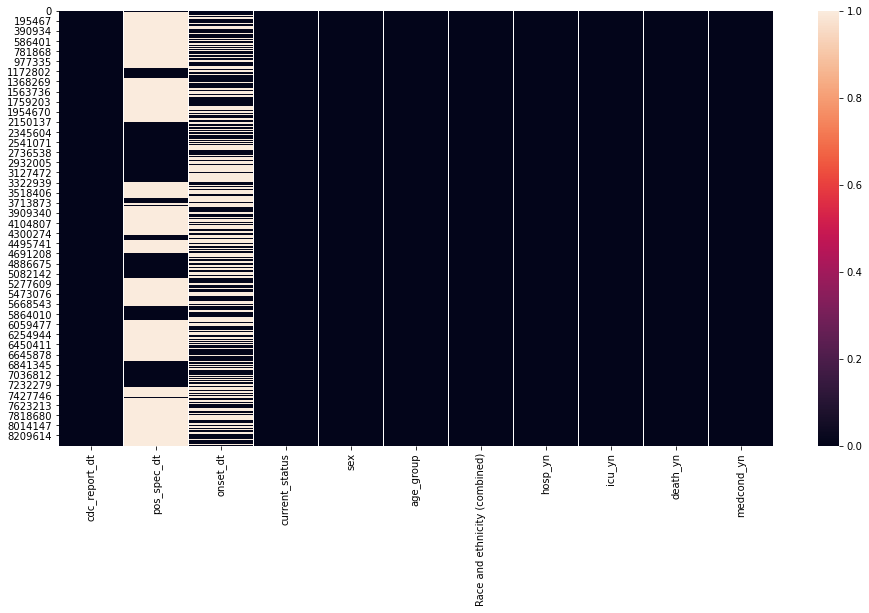

In [5]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

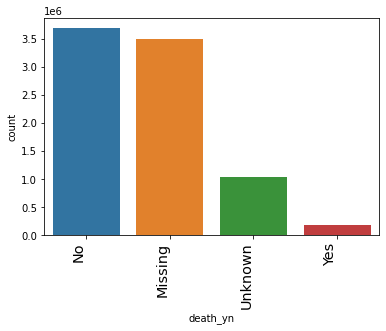

In [6]:
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(x=df['death_yn'],data=df,orient='h')

In [7]:
df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


In [8]:
df['death_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

In [9]:
df.groupby(['sex','death_yn'])['death_yn'].count()

sex      death_yn
Female   Missing     1771658
         No          1946931
         Unknown      537566
         Yes           84743
Male     Missing     1651156
         No          1724192
         Unknown      496944
         Yes           98299
Missing  Missing       12765
         No             6243
         Unknown         360
         Yes             152
Other    Missing          63
         No              140
         Unknown           1
         Yes               3
Unknown  Missing       51272
         No            13299
         Unknown        8895
         Yes             379
Name: death_yn, dtype: int64

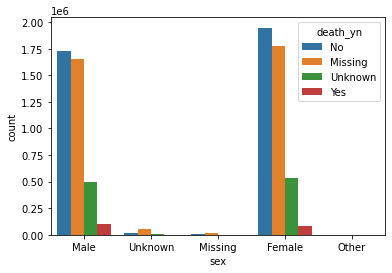

In [10]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
#df[['sex','death_yn']].groupby(['sex']).mean().plot.bar(ax=ax[0])
#ax[0].set_title('Death vs Sex')
sns.countplot('sex',hue='death_yn',data=df)


Higesh Death of sex column is **Male **

In [11]:
df['sex']=df['sex'].fillna('Male')

**Age Group**

In [12]:
df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years', nan, 'Unknown'], dtype=object)

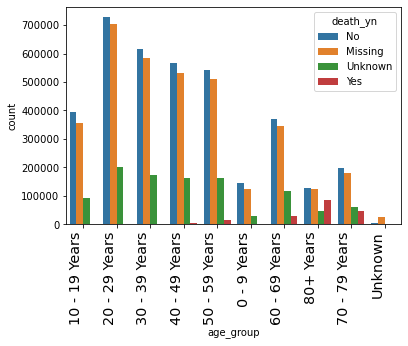

In [13]:
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(df['age_group'],hue='death_yn',data=df)

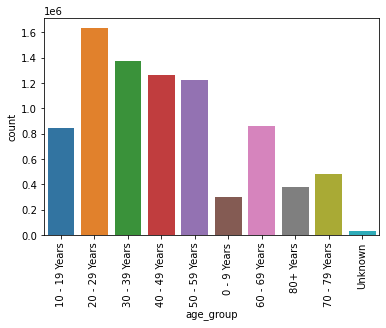

In [14]:
plt.xticks(rotation=90)
sns.countplot('age_group',data=df)

In [15]:
#df['age_group'].astype()

In [16]:
#df=pd.read_csv("../input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv")

In [17]:
df['age']=df['age_group'].replace(['10 - 19 Years','20 - 29 Years','30 - 39 Years','40 - 49 Years','50 - 59 Years','60 - 69 Years','70 - 79 Years','80+ Years','Unknown','0 - 9 Years'],[14,24,34,44,54,64,74,80,25,5])


In [18]:
df['age']=df['age'].fillna(34)

In [19]:
df['age']

0          14.0
1          14.0
2          14.0
3          14.0
4          14.0
           ... 
8405074    34.0
8405075    34.0
8405076    34.0
8405077    34.0
8405078    34.0
Name: age, Length: 8405079, dtype: float64

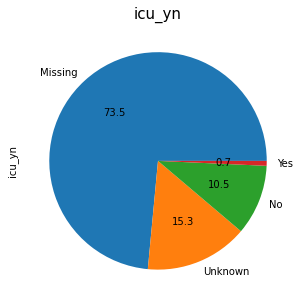

In [20]:
plt.figure(figsize=(10,5))
#plt.subplot(141)
plt.title('icu_yn',fontsize = 15)

#plt.title(figsize=(30,10))
df['icu_yn'].value_counts().plot.pie(autopct='%1.1f')

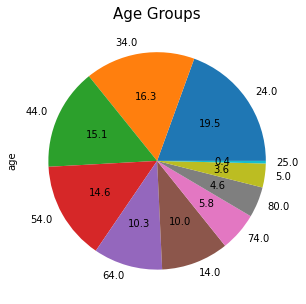

In [21]:
plt.figure(figsize=(10,5))
plt.title('Age Groups',fontsize=15)
df['age'].value_counts().plot.pie(autopct='%1.1f')

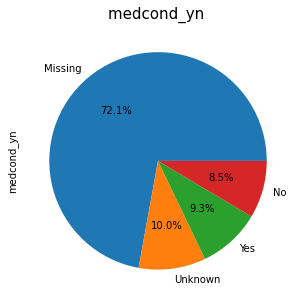

In [22]:
plt.figure(figsize=(10,5))
#plt.subplot(141)
plt.title('medcond_yn ',fontsize = 15)
df['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

In [23]:
df=df.drop(['cdc_report_dt','pos_spec_dt','onset_dt','age_group','Race and ethnicity (combined)'],axis=1)

In [24]:
df.head(5)

,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age
0,Laboratory-confirmed case,Male,No,Unknown,No,No,14.0
1,Laboratory-confirmed case,Male,No,No,No,No,14.0
2,Laboratory-confirmed case,Male,No,No,No,No,14.0
3,Laboratory-confirmed case,Male,Missing,Missing,No,Missing,14.0
4,Laboratory-confirmed case,Male,No,No,No,Yes,14.0


In [25]:
from sklearn.preprocessing import LabelEncoder 
encode=LabelEncoder()


df['sex_n']=encode.fit_transform(df['sex'])
df['current_status_n']=encode.fit_transform(df['current_status'])
df['hosp_yn_n']=encode.fit_transform(df['hosp_yn'])
df['icu_yn_n']=encode.fit_transform(df['icu_yn'])
df['medcond_yn_n']=encode.fit_transform(df['medcond_yn'])
df['deah_n']=encode.fit_transform(df['death_yn'])

In [26]:
df.head()

,current_status,sex,hosp_yn,icu_yn,death_yn,medcond_yn,age,sex_n,current_status_n,hosp_yn_n,icu_yn_n,medcond_yn_n,deah_n
0,Laboratory-confirmed case,Male,No,Unknown,No,No,14.0,1,0,1,2,1,1
1,Laboratory-confirmed case,Male,No,No,No,No,14.0,1,0,1,1,1,1
2,Laboratory-confirmed case,Male,No,No,No,No,14.0,1,0,1,1,1,1
3,Laboratory-confirmed case,Male,Missing,Missing,No,Missing,14.0,1,0,0,0,0,1
4,Laboratory-confirmed case,Male,No,No,No,Yes,14.0,1,0,1,1,3,1


In [27]:
df.isnull().sum()

current_status      0
sex                 0
hosp_yn             0
icu_yn              0
death_yn            0
medcond_yn          0
age                 0
sex_n               0
current_status_n    0
hosp_yn_n           0
icu_yn_n            0
medcond_yn_n        0
deah_n              0
dtype: int64

In [28]:
y=df['deah_n']
y.shape

(8405079,)

In [29]:
x=df.drop(['death_yn','current_status','sex','hosp_yn','icu_yn','medcond_yn','deah_n'],axis=1)


In [30]:
x.shape

(8405079, 6)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decision Tree Algorithm

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

78.33

Logistic Regression Algorithm 

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy score')
print(accuracy_score(y_test,Y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score
0.7314939298614648


KNN Algorithm 

In [34]:
#knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(X_train, y_train)
#Y_pred_knn= knn.predict(X_test)
#print('Accuracy score')
#print(accuracy_score(y_test,y_pred_knn))

Random Forest Algorithm 

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rdf= random_forest.predict(X_test)
print('Accuracy score')
print(accuracy_score(y_test,Y_pred_rdf))

Accuracy score
0.7827236623565749


In [36]:
submission=pd.DataFrame({'Death':Y_pred_rdf})
submission.to_csv('submission.csv',index=False)
                         